<h1 align='center'>Final Project JCDS Purwadhika</h1>
<h1 align='center'>SBA Loan DataSet</h1>
<h4 align='center'>By AGUNG NUGRAHA</h4>
<img src='SBA_logo.jpg'>


### About SBA
Created in 1953, the U.S. Small Business Administration (SBA) continues to help small business owners and entrepreneurs pursue the American dream. The SBA is the only cabinet-level federal agency fully dedicated to small business and provides counseling, capital, and contracting expertise as the nation’s only go-to resource and voice for small businesses.

### Project Background
The loans based on the situation in the current era, where the need for loans increases is influenced by various factors. The increasing need for loans has led to the emergence of various types of organizations / business units to lend funds such as P2P, banks, etc. The problem that will arise is whether the loans that have been disbursed will be paid in full or not.

### Goal
That is what makes me interested in taking this topic, because the application can be developed further according to the needs of each type of business. This application method can be used by various business lines that lend funds to determine that the borrower can pay later by making adjusment first, of course. For this project, I will use the dataset from SBA to determine whether the loan will be paid in full or not, and put my self as a US bank officer that should I accept this loan or not.


### SBA Dataset Columns Explanation
- **LoanNr_ChkDgt** : Identifier Primary key
- **Name** : Borrower name
- **City** : Borrower city
- **State** : Borrower state
- **Zip** : Borrower zip code
- **Bank** : Bank name
- **BankState** : Bank state
- **NAICS**	: North American industry classification system code
- **ApprovalDate** : Date SBA commitment issued
- **ApprovalFY** : Fiscal year of commitment
- **Term** : Loan term in months
- **NoEmp** : Number of business employees
- **NewExist** : 1 = Existing business, 2 = New business
- **CreateJob** : Number of jobs created
- **RetainedJob** : Number of jobs retained
- **FranchiseCode** : Franchise code, (00000 or 00001) = No franchise
- **UrbanRural** : 1 = Urban, 2 = rural, 0 = undefined
- **RevLineCr** : Revolving line of credit: Y = Yes, N = No
- **LowDoc** : LowDoc Loan Program: Y = Yes, N = No
- **ChgOffDate** : The date when a loan is declared to be in default
- **DisbursementDate** : Disbursement date
- **DisbursementGross** : Amount disbursed
- **BalanceGross** : Gross amount outstanding
- **MIS_Status** : Loan status charged off = CHGOFF, Paid in full =PIF
- **ChgOffPrinGr** : Charged-off amount
- **GrAppv** : Gross amount of loan approved by bank
- **SBA_Appv** : SBA’s guaranteed amount of approved loan

In [0]:
# ------------------------------ Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# from google.colab import drive # import csv data from gdrive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

<center><h1 font-size='40px'>Preprocessing and Features Engineering</h1></center>

### The Data

In [0]:
# Import Dataset
df = pd.read_csv('SBAnational.csv')
pd.set_option('max_columns',100)
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4       2.0          0            0              1           0   
1    60      2       2.0          0            0              1           0   
2   180      7       1.0          0            0              1           0   
3    60      2       1.0          0            0              1           0   
4   240     14       1.0          7            7              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate DisbursementGross BalanceGross  \
0         N      Y        NaN        28-Feb-99       $60,000.00        $0.00    
1         N      Y        NaN        31-May-97       $40,000.00        $0.00    
2         N      N        NaN        31-Dec-97      $287,000.00        $0.00    
3         N      Y        NaN        30-Jun-97       $35,000.00        $0.00    
4         N      N        NaN        14-May-97      $229,000.00        $0.00    

  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0      P I F       $0.00    $60,000.00    $48,000.00   
1      P I F       $0.00    $40,000.00    $32,000.00   
2      P I F       $0.00   $287,000.00   $215,250.00   
3      P I F       $0.00    $35,000.00    $28,000.00   
4      P I F       $0.00   $229,000.00   $229,000.00

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
LoanNr_ChkDgt        899164 non-null int64
Name                 899150 non-null object
City                 899134 non-null object
State                899150 non-null object
Zip                  899164 non-null int64
Bank                 897605 non-null object
BankState            897598 non-null object
NAICS                899164 non-null int64
ApprovalDate         899164 non-null object
ApprovalFY           899164 non-null object
Term                 899164 non-null int64
NoEmp                899164 non-null int64
NewExist             899028 non-null float64
CreateJob            899164 non-null int64
RetainedJob          899164 non-null int64
FranchiseCode        899164 non-null int64
UrbanRural           899164 non-null int64
RevLineCr            894636 non-null object
LowDoc               896582 non-null object
ChgOffDate           162699 non-null object
DisbursementDate 

### Remove Currency Sign ( $ and , )

In [0]:
# Remove dollar sign at coloumns Disbursement Gross, Balance Gross, ChgOffPrinGr, GrAppv, SBA_Appv

def remove_sign(item):
        new = item.replace('$','')
        new2 = new.replace(' ','')
        new3 = new2.replace(',','')
        return float(new3)

df['DisbursementGross'] = df['DisbursementGross'].apply(lambda x : remove_sign(x))
df['BalanceGross'] = df['BalanceGross'].apply(lambda x : remove_sign(x))
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(lambda x : remove_sign(x))
df['GrAppv'] = df['GrAppv'].apply(lambda x : remove_sign(x))
df['SBA_Appv'] = df['SBA_Appv'].apply(lambda x : remove_sign(x))

### Change ApprovalFY to Interger

In [0]:
# Check column ApprovalFY (mixed string and int)
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [0]:
# Change ApprovalFY to year (int)

def change_year(x):
    if x['ApprovalFY'] == '1976A':
        return 1976
    else:
        return int(x['ApprovalFY'])
    
df['ApprovalFY'] = df.apply(change_year,axis=1)

In [0]:
# After
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971])

### Industrial Sector by NAICS Code

We only need first two digit of NAICS code to determine the idustrial sector of the business. The references of idustrial code could be find on this site : https://www.sba.gov/sites/default/files/files/Size_Standards_Table.pdf


In [0]:
# -- Change naics code to 2 digit

temp = []
for item in df['NAICS']:
    if item == 0 :
        temp.append(0)
    else :
        a = list(str(item))[:2]
        b = ''.join(a)
        temp.append(b)

df['NAICS'] = temp

# -- Drop NAICS = 0
index_naics = []
for item in list(df[df['NAICS'] == 0].index):
    index_naics.append(item)

df.drop(index_naics,inplace=True)

In [0]:
df['NAICS'] = df['NAICS'].map({
    '11': 'Agriculture / Forestry / Fishing / Hunting',
    '21': 'Mining / Quarrying / Oil&Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation / Warehousing',
    '49': 'Transportation / Warehousing',
    '51': 'Information',
    '52': 'Finance / Insurance',
    '53': 'Real Estate / Rental / Leasing',
    '54': 'Proffesional / Scientific / Tech.Service',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative & Support / Waste Management / Remediation Services',
    '61': 'Educational',
    '62': 'Health Care / Social Assistance',
    '71': 'Arts / Entertainment / Recreation',
    '72': 'Accomodation / Food Services',
    '81': 'Other Services (except public admin)',
    '92': 'Public Administration'
})

### Relation Between Year and MIS_Status

To retrieve the latest time span from data, we can retrieve data **from 2000 and above.**

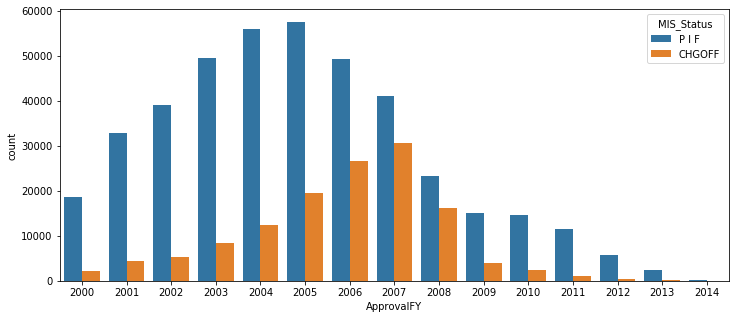

In [0]:
plt.figure(figsize=(12,5))
sns.countplot(data=df[df['ApprovalFY'] >= 2000],x='ApprovalFY',hue='MIS_Status')

> The Great Recession refers to the economic downturn from 2007 to 2009 after the bursting of the U.S. housing bubble and the global financial crisis. So make sense why in 2007 and 2008 the number of CGHOFF was high. **This is caused by The Great Recession.**

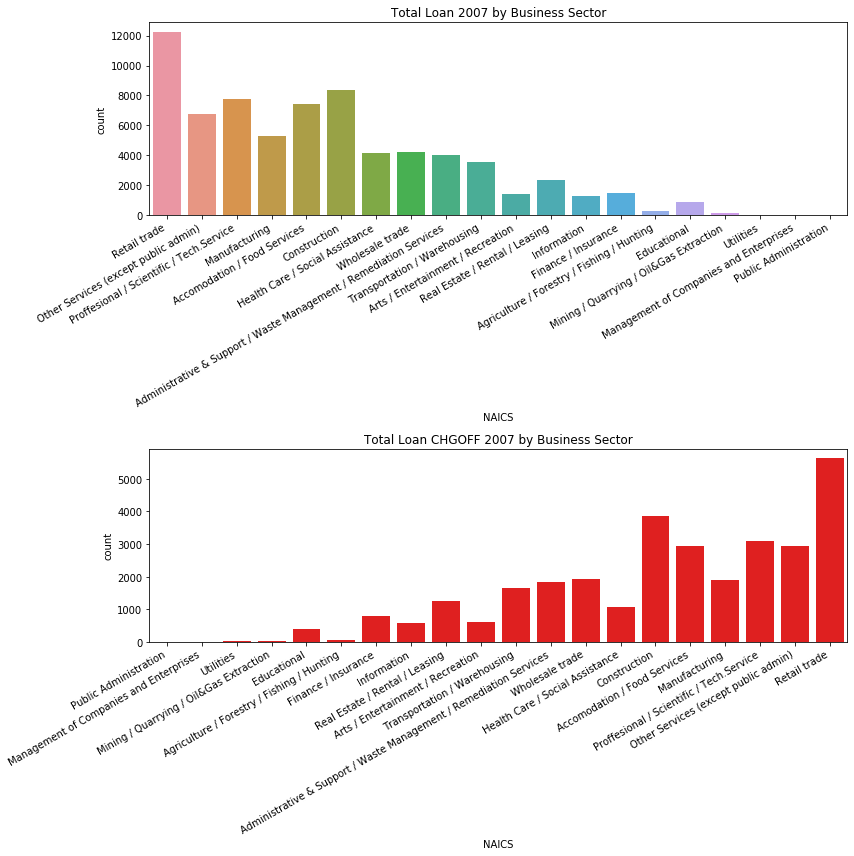

In [0]:
plt.figure(figsize=(12,12))


plt.subplot(2,1,1)
sns.countplot(data=df[df['ApprovalFY'] == 2007],x='NAICS',order=df['NAICS'].value_counts().index)
plt.title('Total Loan 2007 by Business Sector')
plt.xticks(rotation=30, ha='right')

plt.subplot(2,1,2)
sns.countplot(data=df[(df['ApprovalFY'] == 2007) & (df['MIS_Status'] == 'CHGOFF')],x='NAICS',color='r',order=df['NAICS'].value_counts(ascending=True).index)
plt.title('Total Loan CHGOFF 2007 by Business Sector')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()

> Loan vs MIS_Status by idustrial sector at the beginning of the Great Recession, shows that retail trade and construction got the biggest impact. And, from this visualization we can say too that business sector (NAICS) is one of the important feature from this dataset.

### Dataset Restrictions by Year

From here we will limit our datasets from 2000 and above. But I will discard 2007-2009 which in my opinion could be biased due to too large CHGOFF in that year caused by The Great Recession.

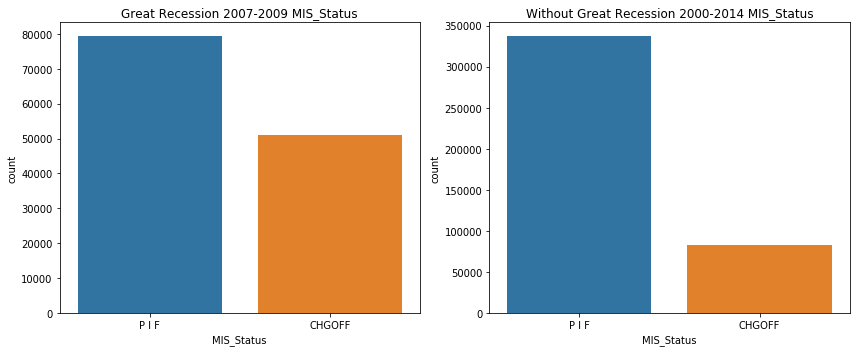

In [0]:
# --- Data without Great Recession Effect (main data )
df00_14 = df[(df['ApprovalFY'] == 2000) | (df['ApprovalFY'] == 2001) | (df['ApprovalFY'] == 2002) |
  (df['ApprovalFY'] == 2003) | (df['ApprovalFY'] == 2004) | (df['ApprovalFY'] == 2005)  | (df['ApprovalFY'] == 2006) |
  (df['ApprovalFY'] == 2010) | (df['ApprovalFY'] == 2011) | (df['ApprovalFY'] == 2012) | (df['ApprovalFY'] == 2013)
  | (df['ApprovalFY'] == 2014)]

# df00_14 = df[(df['ApprovalFY'] >= 1990) & (df['ApprovalFY'] != 2007) & (df['ApprovalFY'] != 2008) & (df['ApprovalFY'] != 2009)]


# --- Data with Great Recession Effect (for exploratory)
df07_09 = df[(df['ApprovalFY'] == 2007) | (df['ApprovalFY'] == 2008) | (df['ApprovalFY'] == 2009)]
df07_09

# -- Plot the difference
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(df07_09['MIS_Status'])
plt.title('Great Recession 2007-2009 MIS_Status')

plt.subplot(1,2,2)
sns.countplot(df00_14['MIS_Status'])
plt.title('Without Great Recession 2000-2014 MIS_Status')

plt.tight_layout()

### Real Estate Feature

I will make a feature that called RealEstate, it means that the loan is backed up with real estate or not. From journal that I've read the loan that have term more than 240 month will be backed up with real estate. I think it is one of the important feature to this dataset too.

- RealEstate = 1 (Backed up with real estate)
- RealEstate = 0 (not Backed up with real estate)

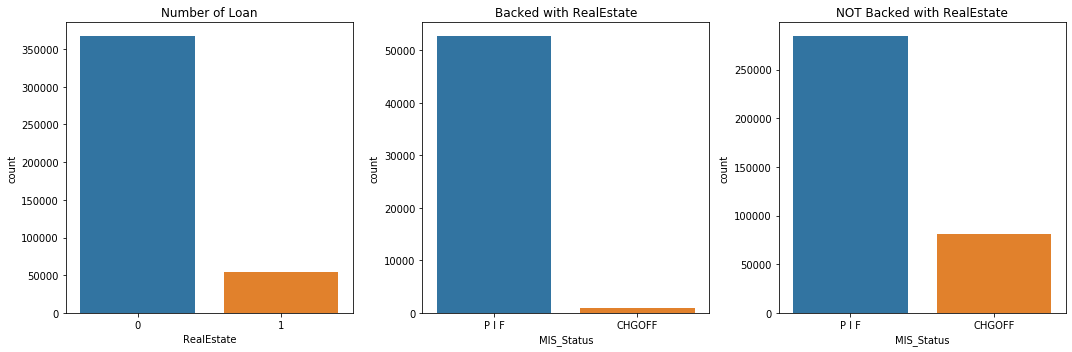

In [0]:
# real restate

def real_estate(x) :
    if x['Term'] >= 240:
        return 1
    else:
        return 0
    
df00_14['RealEstate'] = df00_14.apply(real_estate,axis=1)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(df00_14['RealEstate'])
plt.title('Number of Loan')

plt.subplot(1,3,2)
sns.countplot(df00_14[df00_14['RealEstate'] == 1]['MIS_Status'])
plt.title('Backed with RealEstate')

plt.subplot(1,3,3)
sns.countplot(df00_14[df00_14['RealEstate'] == 0]['MIS_Status'])
plt.title('NOT Backed with RealEstate')


plt.tight_layout()

###  Drop Some Columns and  NaN Values

There are some colums that need to drop because in my opnion they will not give effect to loan status that will paid in full or charged off. That columns are :
- Name
- City
- Zip
- Bank
- Bank State
- Approval Date
- CreateJob
- RetainedJob
- RevLineCr
- DisbursementDate
- Balance Gross
- ChargeOff

and drop NaN value too :

- Because LowDoc have some data which has NaN values so we must fill or drop. Because the amount of LowDoc data that is NaN values does not reach 1%. Then we just drop the NAN value
- NaN values at MIS_status so weird, because of that data has the DisbursementGross that very much different than ApprovalGr. So I decided to drop too the NaN value from MIS_status

In [0]:
df_semi = df00_14.drop(['Name','City','Zip','Bank','BankState','ApprovalDate','CreateJob','RetainedJob','RevLineCr','ChgOffDate','DisbursementDate','BalanceGross','ChgOffPrinGr'],axis=1)

# -- Dropna at LowDoc and MIS_Status
df_semi.dropna(subset=['LowDoc','MIS_Status'],axis=0,inplace=True)

# -- Because the amount of nanvalue in nxt is very small (131 out of 300K data)
df_semi.dropna(subset=['NewExist'],axis=0,inplace=True)

# check df_semi information (no nan values anymore)
df_semi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418159 entries, 12 to 894832
Data columns (total 15 columns):
LoanNr_ChkDgt        418159 non-null int64
State                418159 non-null object
NAICS                418159 non-null object
ApprovalFY           418159 non-null int64
Term                 418159 non-null int64
NoEmp                418159 non-null int64
NewExist             418159 non-null float64
FranchiseCode        418159 non-null int64
UrbanRural           418159 non-null int64
LowDoc               418159 non-null object
DisbursementGross    418159 non-null float64
MIS_Status           418159 non-null object
GrAppv               418159 non-null float64
SBA_Appv             418159 non-null float64
RealEstate           418159 non-null int64
dtypes: float64(4), int64(7), object(4)
memory usage: 51.0+ MB


### New Exist Columns

From table information we know that NewExist (1 = Existing Business, 2 = New Business). This represents whether the business is an existing business (in exis- tence for more than 2 years) or a new business (in existence for less than or equal to 2 years). Will will change that to :

- Existing Business = 1 (from 1)
- New Businees = 0 (from 2)

But before that, we need to remove some value that not defined

In [0]:
# NewExist = 0 not defined what it means, because it is only small number of data, I decided to drop it
df_semi['NewExist'].value_counts()

1.0    305421
2.0    112261
0.0       477
Name: NewExist, dtype: int64

In [0]:
# -- Drop NewExist = 0
index_exist0 = []
for item in list(df_semi[df_semi['NewExist'] == 0].index):
    index_exist0.append(item)

df_semi.drop(index_exist0,inplace=True)

# -- Change newExist
def change_newexist(x):
    if x == 1:
        return 1
    else:
        return 0
df_semi['NewExist'] = df_semi['NewExist'].apply(lambda x : change_newexist(x))

### Franchise Columns

From table information we know that Franchise code, (00000 or 00001) = Nofranchise. So I decided to separate the Franchise to be :

- FranchiseCode = 1 (have franchise)
- FranchiseCode = 0 (no franchise)

In [0]:
# -- change franchise

def change_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

df_semi['FranchiseCode'] = df_semi['FranchiseCode'].apply(lambda x: change_franchise(x))

### Low Doc Columns

After checking LowDoc there are some value that not defined as 'N' or 'Y'. That codes are C,S,A,R,and0 which are not defined and dont know what that code means. Because of the number of that values are not too much (could see on the cell below). So, I decided to drop it too.

In [0]:
df_semi['LowDoc'].value_counts()

N    381369
Y     35541
C       516
S       206
A        28
R        20
1         1
0         1
Name: LowDoc, dtype: int64

In [0]:
index_drop_lowdoc = []
for index in list(df_semi[(df_semi['LowDoc'] != 'N') & (df_semi['LowDoc'] != 'Y')].index):
    index_drop_lowdoc.append(index)

df_semi.drop(index_drop_lowdoc,inplace=True)

# -- change LowDoc ('Y' = 1, 'N' = 0)
def change_lowdoc(x):
    if x == 'N':
        return 0
    else :
        return 1

df_semi['LowDoc'] = df_semi['LowDoc'].apply(lambda x: change_lowdoc(x))

In [0]:
df_semi['LowDoc'].value_counts()

0    381369
1     35541
Name: LowDoc, dtype: int64

### Urban Rural Columns

Drop UrbanRural that no defined (urbanrural = 0) and change the codes for urban rural which are :

- Urban = 1
- Rural = 0

In [0]:
df_semi['UrbanRural'].value_counts()

1    335143
2     75733
0      6034
Name: UrbanRural, dtype: int64

In [0]:
# -- Drop UrbanRural = 0
index_urbanrural = []
for item in list(df_semi[df_semi['UrbanRural'] == 0].index):
    index_urbanrural.append(item)

df_semi.drop(index_urbanrural,inplace=True)

# -- Change UrbanRural
def change_urbanrural(x):
    if x == 1:
        return 1
    else:
        return 0
df_semi['UrbanRural'] = df_semi['UrbanRural'].apply(lambda x : change_urbanrural(x))

In [0]:
df_semi['UrbanRural'].value_counts()

1    335143
0     75733
Name: UrbanRural, dtype: int64

### Distribution of NoEmp compare to MIS_Status

From the distribution of NoEmp we could see there are some outliers. Companies with more than 1500 employees are not eligible for SBA loans. References :

> "According to the SBA, a small businesses have a maximum of anywhere between 250 and 1500 employees— all depending on the specific industry the business is in. Additionally, businesses have revenue limits that they must not exceed if they want to qualify for SBA financing. In general, companies with more than 1500 employees are not eligible for SBA loans." **References :** https://www.sba.gov/sites/default/files/files/Size_Standards_Table.pdf and https://www.sba7a.loans/sba-7a-loans-small-business-blog/small-business-definition

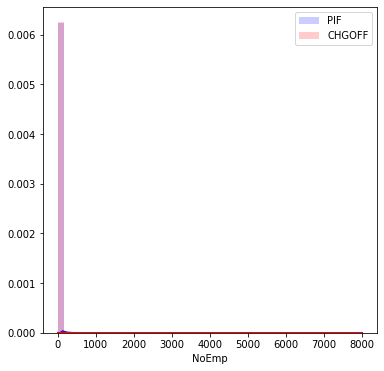

In [0]:
# check all distribution of NoEmp

plt.figure(figsize=(6,6))
sns.distplot(df_semi[df_semi['MIS_Status'] == 'P I F']['NoEmp'],hist_kws=dict(alpha=0.2),color='blue',label='PIF')
sns.distplot(df_semi[df_semi['MIS_Status'] == 'CHGOFF']['NoEmp'],hist_kws=dict(alpha=0.2),color='red',label='CHGOFF')
plt.legend()

In [0]:
# check total of NoEmp that outlier

df_semi[df_semi['NoEmp'] >= 1500]['MIS_Status'].value_counts()

P I F     33
CHGOFF     5
Name: MIS_Status, dtype: int64

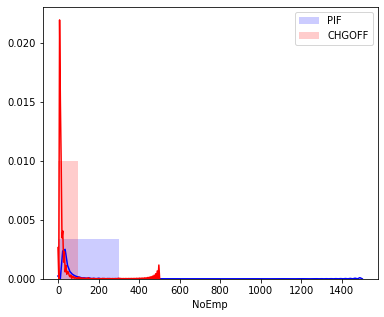

In [0]:
# Try the distribution without outlier

plt.figure(figsize=(6,5))
sns.distplot(df_semi[(df_semi['NoEmp'] <= 1500) & (df_semi['MIS_Status'] == 'P I F')]['NoEmp'],hist_kws=dict(alpha=0.2),color='blue',label='PIF',bins=5)
sns.distplot(df_semi[(df_semi['NoEmp'] <= 1500) & (df_semi['MIS_Status'] == 'CHGOFF')]['NoEmp'],hist_kws=dict(alpha=0.2),color='red',label='CHGOFF',bins=5)
plt.legend()

> Looks better and makes sense. The logic is that the smaller the number of employees the smaller the size of the company, and vice versa. The greater the size of the company, then it can be defined that the business is more stable and less likely to default. So, it can be agreed that NoEmp is also an important feature in determining loan status.

In [0]:
# Take out the outlier of NoEmp

df_semi = df_semi[df_semi['NoEmp'] <= 1500]
df_semi

LoanNr_ChkDgt State                                 NAICS  ApprovalFY  \
12         1000146010    NC                          Retail trade        2006   
24         1000446006    AR          Accomodation / Food Services        2006   
28         1000506000    CA                           Educational        2006   
30         1000516003    FL                          Construction        2006   
32         1000526006    LA        Real Estate / Rental / Leasing        2006   
...               ...   ...                                   ...         ...   
894801     9898054006    CO                           Educational        2006   
894806     9898094007    AZ  Other Services (except public admin)        2006   
894809     9898154001    NV                          Construction        2006   
894814     9898254007    AZ                           Information        2006   
894832     9898734009    IL          Accomodation / Food Services        2006   

        Term  NoEmp  NewExist  FranchiseCode  UrbanRural  LowDoc  \
12       162      2         0              1           1       0   
24       126      7         1              0           1       0   
28        83     18         0              0           1       0   
30        84      4         1              0           1       0   
32        60      3         1              0           1       0   
...      ...    ...       ...            ...         ...     ...   
894801    84      2         1              0           0       0   
894806    29      2         0              0           1       0   
894809   240     20         1              0           1       0   
894814    84      3         1              0           1       0   
894832   240     10         1              0           1       0   

        DisbursementGross MIS_Status     GrAppv   SBA_Appv  RealEstate  
12               253400.0      P I F   253400.0   190050.0           0  
24               137300.0      P I F   137300.0   116705.0           0  
28               438541.0      P I F   100000.0    50000.0           0  
30                51440.0      P I F    35000.0    17500.0           0  
32                50000.0      P I F    50000.0    42500.0           0  
...                   ...        ...        ...        ...         ...  
894801            30000.0      P I F    30000.0    15000.0           0  
894806           170000.0     CHGOFF   170000.0   127500.0           0  
894809           509000.0      P I F   509000.0   509000.0           1  
894814            15635.0      P I F    10000.0     5000.0           0  
894832          1038000.0      P I F  1038000.0  1038000.0           1  

[410840 rows x 15 columns]

### Gross Disbursement and GrAppv Differences

In [0]:
# check DisbursementGross that less , more, and equals ith GrAppv

print('DisbursementGross less than GrAppv, total : ',len(df_semi[df_semi['DisbursementGross'] < df_semi['GrAppv']]), ' from  : ',len(df_semi))
print()
print('DisbursementGross more than GrAppv, total : ',len(df_semi[df_semi['DisbursementGross'] > df_semi['GrAppv']]), ' from  : ',len(df_semi))
print()
print('DisbursementGross equals with GrAppv, total : ',len(df_semi[df_semi['DisbursementGross'] == df_semi['GrAppv']]), ' from  : ',len(df_semi))

DisbursementGross less than GrAppv, total :  24429  from  :  410840

DisbursementGross more than GrAppv, total :  100388  from  :  410840

DisbursementGross equals with GrAppv, total :  286023  from  :  410840


> I decided to use the data which Gross Disbursement equals with GrAppv

In [0]:
df_semi = df_semi[df_semi['DisbursementGross'] == df_semi['GrAppv']]

### Term Columns

Check data that has term = 0. Because it's not make sense loans have term = 0, so I decided to drop it.

In [0]:
df_semi[df_semi['Term'] == 0]['MIS_Status'].value_counts()

CHGOFF    207
P I F      23
Name: MIS_Status, dtype: int64

In [0]:
df_semi = df_semi[df_semi['Term'] != 0]

### Final Dataframe

**From here we have finished preprocessing, feature engineering and some exploratory data for preprocessing**

In [0]:
df_final = df_semi.copy()

<center><h1 font-size='40px'>Exploratory Data Analysis</h1></center>
<center><h1 font-size='40px'>(EDA)</h1></center>

### CHGOFF Percentage per State

In [0]:
# -- import csv that contain state name
states = pd.read_csv('states.csv')


# -- percentage of CHGOFF based on state
gb1 = df_final[df_final['MIS_Status'] == 'CHGOFF'].groupby('State').count()[['MIS_Status']].reset_index()
gb2 = df_final[df_final['MIS_Status'] == 'P I F'].groupby('State').count()[['MIS_Status']].reset_index()
gb_state = pd.merge(gb1,gb2,on='State')
gb_state.rename(columns={'MIS_Status_x':'CHGOFF','MIS_Status_y':'P I F'},inplace=True)

def percent(x):
    a = x['CHGOFF'] / (x['P I F'] + x['CHGOFF'])
    return round(a,3)
gb_state['Percent'] = gb_state.apply(percent,axis=1)


# -- Input State Name based on state code
def apply_name_states(x) :
    return states[states['Code'] == x['State']]['State'].values[0]

gb_state['StateName'] = gb_state.apply(apply_name_states,axis=1)
df_state_MIS = gb_state.copy()


# -- Chloropleth
fig = go.Figure(data=go.Choropleth(
    locations=df_state_MIS['State'], # Spatial coordinates
    z = df_state_MIS['Percent'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'spectral',
    text = df_state_MIS['StateName'],
    colorbar_title = "Percentage",
))

fig.update_layout(
    title_text = 'CGHOFF Percentage per State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

>  From the reference, states such as Wyoming and North Dakota had stronger economies (due to their reliance on minerals and oil) which may explain they have the lowest percentage of CHGOFF. The reliance of a state and their economics status may will make states will be a crucial factor too for predicting.

Text(0.5, 1.0, 'Blue Zone (Alabama)')

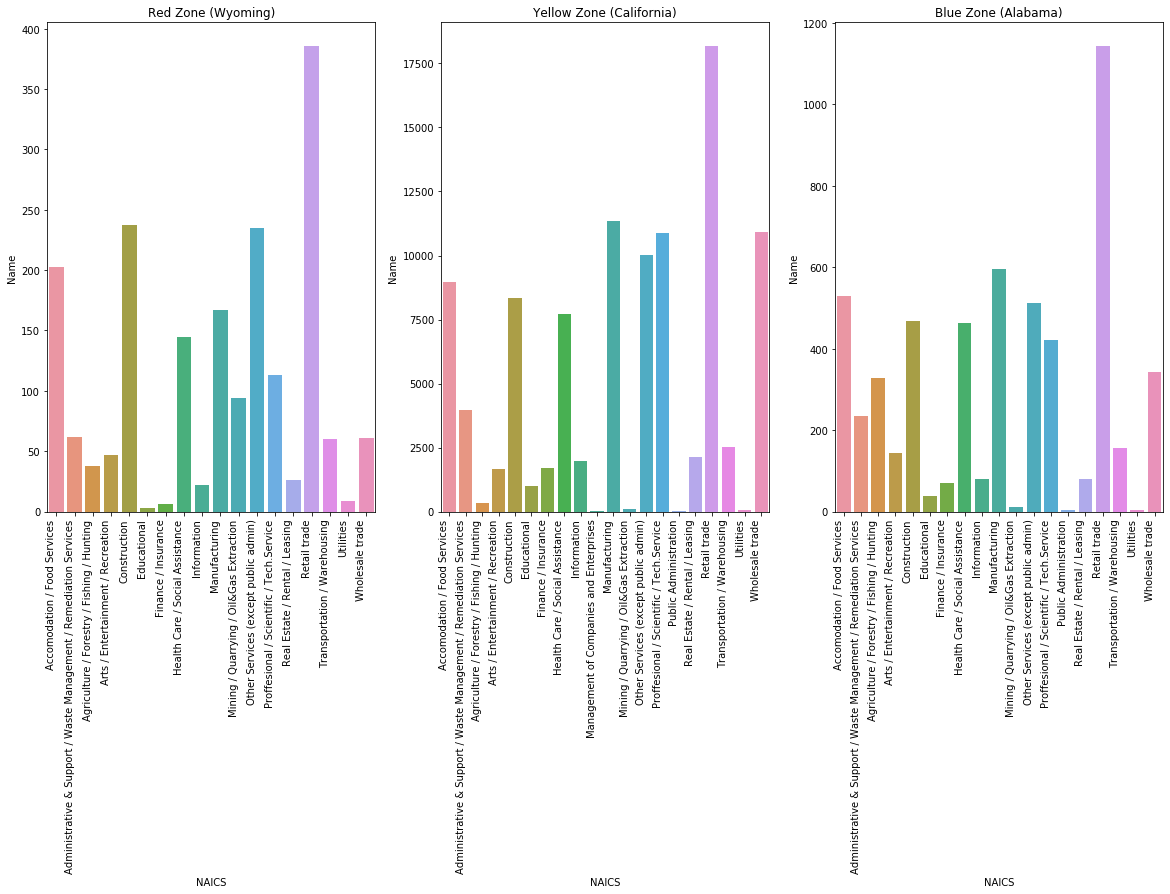

In [0]:
df_StateNAICS = df.groupby(['State','NAICS']).count().reset_index()

plt.figure(figsize=(20,9))

plt.subplot(1,3,1)
sns.barplot(data=df_StateNAICS[df_StateNAICS['State'] == 'WY'],x='NAICS',y='Name')
plt.xticks(rotation=90, ha='right')
plt.title('Red Zone (Wyoming)')

plt.subplot(1,3,2)
sns.barplot(data=df_StateNAICS[df_StateNAICS['State'] == 'CA'],x='NAICS',y='Name')
plt.xticks(rotation=90, ha='right')
plt.title('Yellow Zone (California)')

plt.subplot(1,3,3)
sns.barplot(data=df_StateNAICS[df_StateNAICS['State'] == 'AL'],x='NAICS',y='Name')
plt.xticks(rotation=90, ha='right')
plt.title('Blue Zone (Alabama)')

> It proved that states in the red zone have a good reliance with oil, gas or mineral. Although there is more industrial retail, but the oil, gas and mineral industry is more stable and more profitable.

### Average DisbursementGross per Year

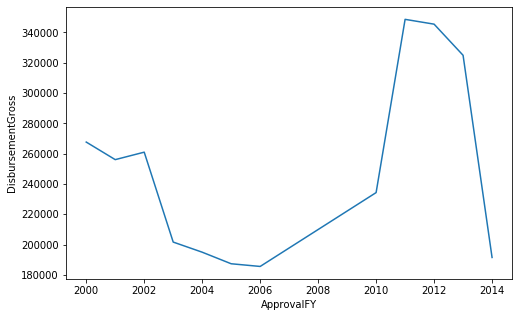

In [0]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df_final.groupby('ApprovalFY').mean().reset_index()['ApprovalFY'],y=df_final.groupby('ApprovalFY').mean().reset_index()['DisbursementGross'])

> The average of the DisbursementGross per year is fluctuative, there is a decreasing of the loan since 2002 until 2006, but after the great recession (2010) the loan increase sharply.

### Disbursement Distribution per State

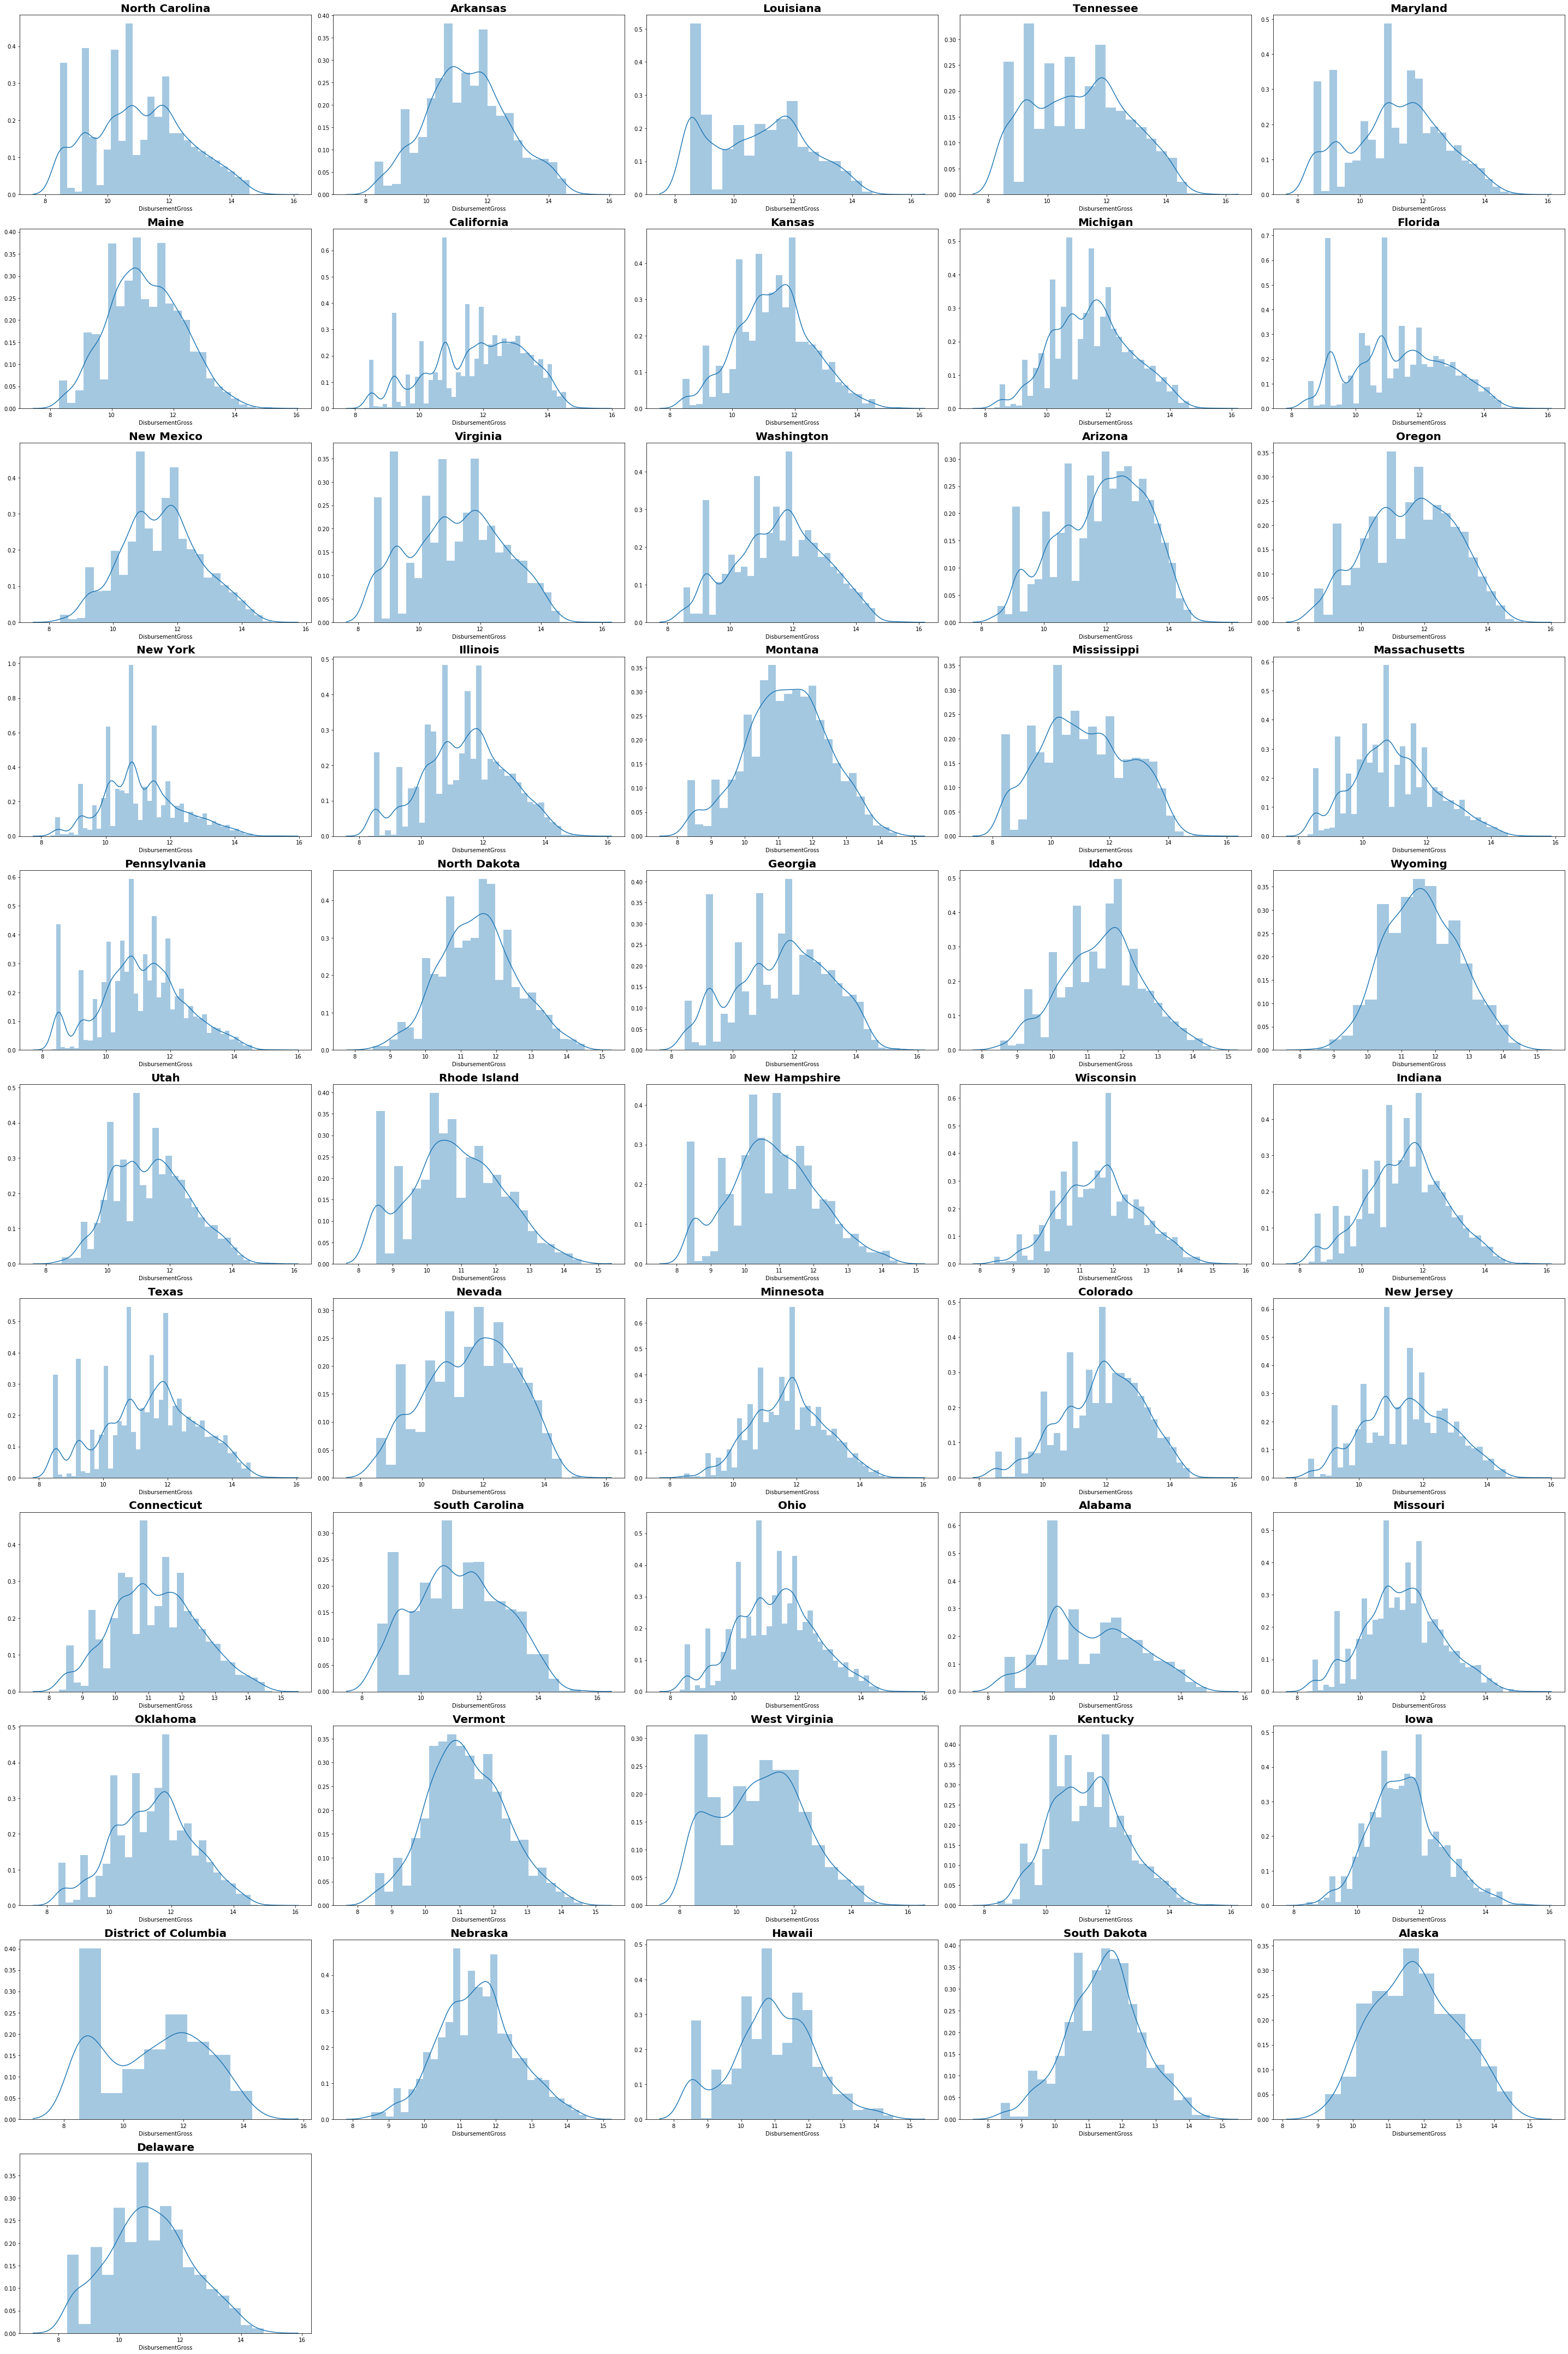

In [0]:
# -- list of unique state
state_unique = list(df_final['State'].unique())

# -- visualization of distribution 
plt.figure(figsize=(40,60))
i = 1
for item in state_unique :
    subs = df_final[df_final['State'] == item]['DisbursementGross']
    plt.subplot(11,5,i)
    sns.distplot(np.log(subs)) #log because our without log seem its not normal
    plt.title(list(df_state_MIS[df_state_MIS['State'] == item]['StateName'])[0],fontweight='bold',fontsize=20) #df_state_MIS from above (map usa)
    i += 1 

plt.tight_layout()

> It looks like that most of them have normal distribution after normality using log and it's a good sign of disbursementgross. So next we may using standard scaler for standardize the data.

###  Pairplot

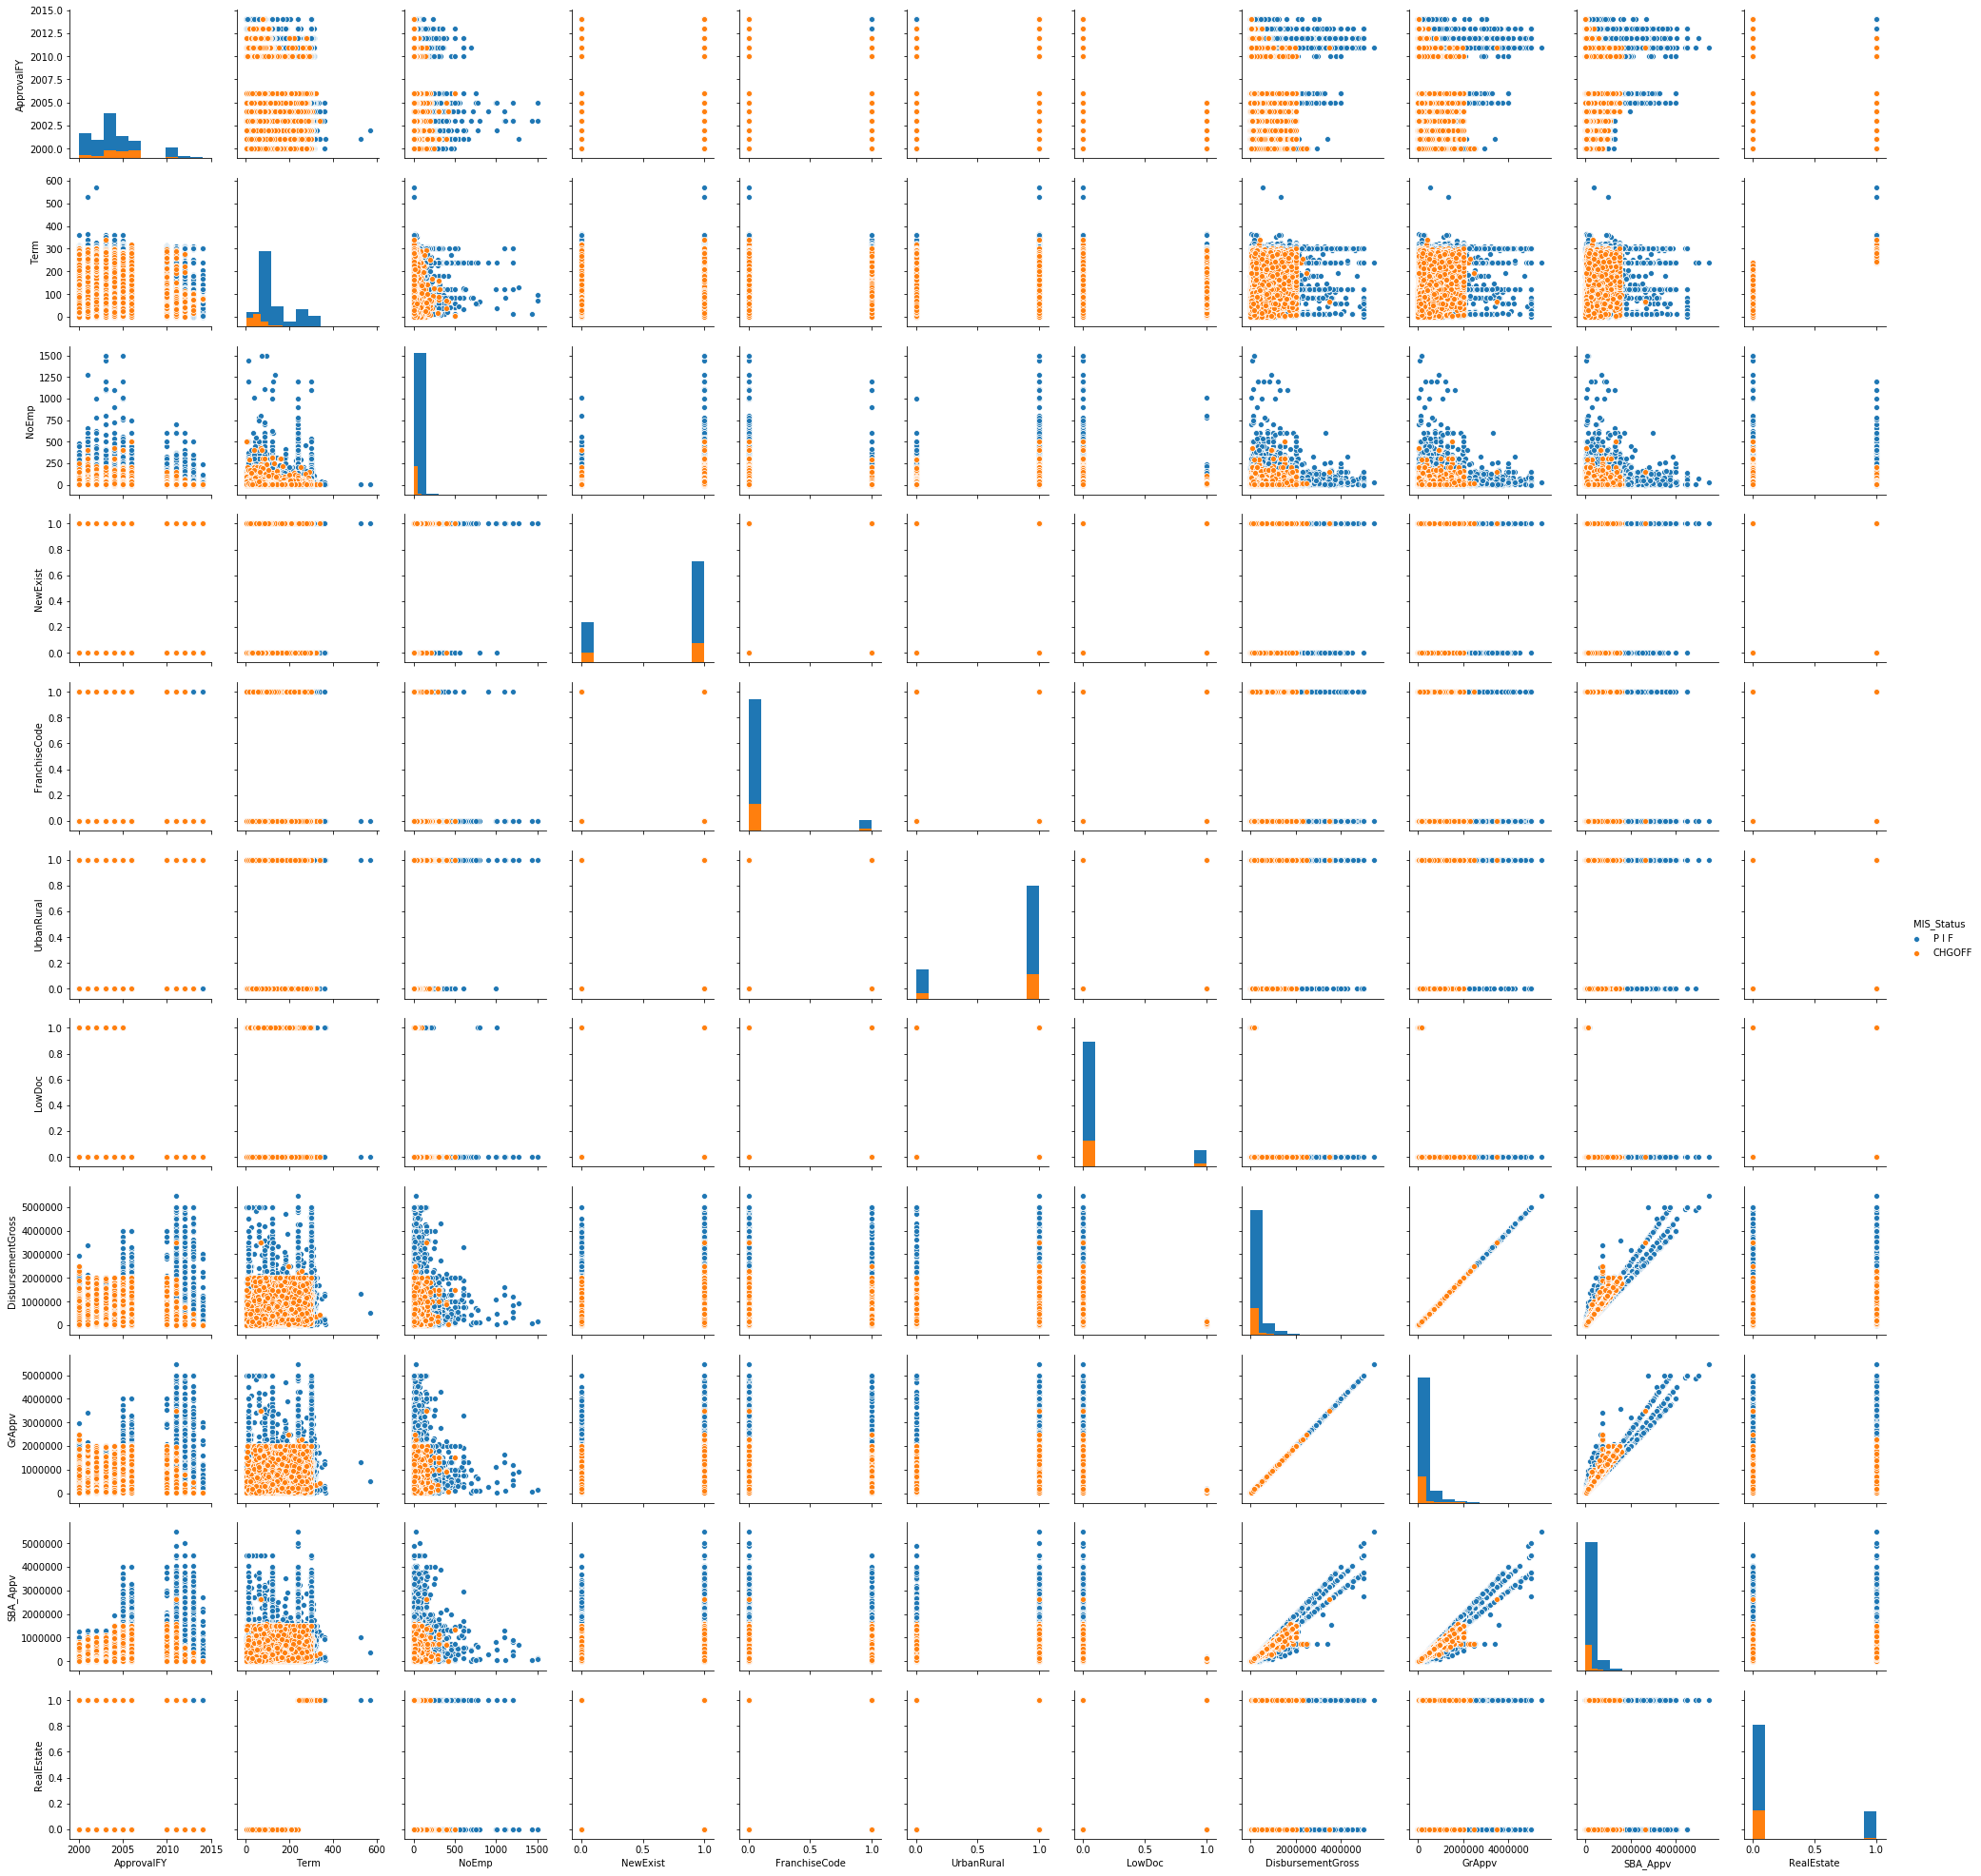

In [0]:
sns.pairplot(df_final[[
'ApprovalFY',
'Term',
'NoEmp',
'NewExist',
'FranchiseCode',
'UrbanRural',
'LowDoc',
'DisbursementGross',
'GrAppv',
'SBA_Appv',
'RealEstate',
'MIS_Status',]],hue='MIS_Status',diag_kind='hist')

> From this we can see that, CGHOFF generally occurs on terms smaller than 300 months. While in other features, CHGOFF occurs almost entirely in DisbursementGross and SBA_appv under 2 million dollars.

### Correlation Between Features (HeatMap)

Text(0.5, 1, 'Correlation Between Features')

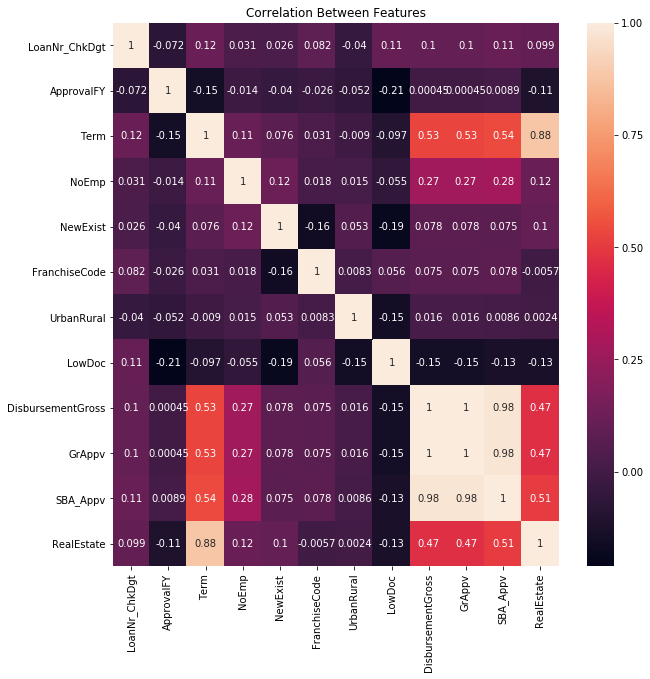

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot=True)
plt.title('Correlation Between Features')

###### Check Correlation Between Features (term, disbursementgross, and SBA Appv)

Because thay have some good correaltion from heatmap visualization, then we need to check them with statistic. Is they are dependent each others or not?

References Chi2 : https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

- H0 : The two samples are independent
- H1 : There is a dependency between the samples

In [0]:
# -- import chi squared
from scipy.stats import chi2_contingency

# -- chi squared contingecy
print('-----','Correlation between term and disbursement gross','-----' )
stat, p, dof, expected = chi2_contingency(df_final[['DisbursementGross','Term']])
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

print()
print('-----','Correlation between term and SBA approval','-----' )
stat, p, dof, expected = chi2_contingency(df_final[['SBA_Appv','Term']])
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

print()
print('-----','Correlation between disbursement gross and SBA_appv','-----' )
stat, p, dof, expected = chi2_contingency(df_final[['DisbursementGross','SBA_Appv']])
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

----- Correlation between term and disbursement gross -----
stat=70004258.055, p=0.000000
Probably dependent

----- Correlation between term and SBA approval -----
stat=90037260.984, p=0.000000
Probably dependent

----- Correlation between disbursement gross and SBA_appv -----
stat=956693519.623, p=0.000000
Probably dependent


> So this result prove our analysis that it has correlation between Term, DisbursementGross, and SBA_Appv  **(dependent)**

### Export Final Data to CSV

In [0]:
# export df_final to csv
df_final.to_csv('df_fixnew.csv')

> I need to export it, because I will do machine learning using google colab and export it to MySQL (for dashboard)

<center><h1 font-size='40px'>Machine Learning</h1></center>

In [1]:
# ------------------------------ Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive # import csv data from gdrive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### The Final Dataset

In [2]:
# -------- Import CSV

drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Purwadhika/Final Project Revisi/df_fixnew.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Unnamed: 0  LoanNr_ChkDgt State  ...    GrAppv  SBA_Appv  RealEstate
0          12     1000146010    NC  ...  253400.0  190050.0           0
1          24     1000446006    AR  ...  137300.0  116705.0           0
2          32     1000526006    LA  ...   50000.0   42500.0           0
3          38     1000576010    TN  ...   20000.0   17000.0           0
4          49     1000686008    MD  ...   10000.0    8500.0           0

[5 rows x 16 columns]

In [0]:
# ------- Change MIS_Status (0='CHGOFF' and 1='PIF')

def change_status(x):
  if x['MIS_Status'] == 'P I F':
    return 1
  else :
    return 0

df['MIS_Status'] = df.apply(change_status,axis=1)

In [4]:
# ---- Remove unnamed, loan id, approvalFY, GrAppv and  one hot encoding NAICS Code and State

df = df.drop(['Unnamed: 0','LoanNr_ChkDgt','ApprovalFY','GrAppv'],axis=1)
df = pd.get_dummies(df,columns=['NAICS','State'],drop_first=True)
df

Term  NoEmp  NewExist  ...  State_WI  State_WV  State_WY
0        162      2         0  ...         0         0         0
1        126      7         1  ...         0         0         0
2         60      3         1  ...         0         0         0
3         84      4         1  ...         0         0         0
4         84      1         0  ...         0         0         0
...      ...    ...       ...  ...       ...       ...       ...
285788    84      2         1  ...         0         0         0
285789    84      2         1  ...         0         0         0
285790    29      2         0  ...         0         0         0
285791   240     20         1  ...         0         0         0
285792   240     10         1  ...         0         0         0

[285793 rows x 79 columns]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285793 entries, 0 to 285792
Data columns (total 79 columns):
 #   Column                                                                    Non-Null Count   Dtype  
---  ------                                                                    --------------   -----  
 0   Term                                                                      285793 non-null  int64  
 1   NoEmp                                                                     285793 non-null  int64  
 2   NewExist                                                                  285793 non-null  int64  
 3   FranchiseCode                                                             285793 non-null  int64  
 4   UrbanRural                                                                285793 non-null  int64  
 5   LowDoc                                                                    285793 non-null  int64  
 6   DisbursementGross                                   

In [0]:
df.describe()

Term          NoEmp  ...       State_WV       State_WY
count  285793.000000  285793.000000  ...  285793.000000  285793.000000
mean      109.271991       9.397704  ...       0.003475       0.002572
std        77.399849      21.491552  ...       0.058843       0.050648
min         1.000000       0.000000  ...       0.000000       0.000000
25%        60.000000       2.000000  ...       0.000000       0.000000
50%        84.000000       4.000000  ...       0.000000       0.000000
75%       120.000000      10.000000  ...       0.000000       0.000000
max       569.000000    1500.000000  ...       1.000000       1.000000

[8 rows x 79 columns]

### Setting Features and Target, Train Test Split, and SMOTE for Train Data

I will use this setting features target and train test split for the model that I have prepared which is Light GBM. But later, I will do another train test split and SMOTE for finding other algorithms that may be have good result than Light BGM that I have prepared.

In [0]:
# ------- Setting Features and Target
X = df.drop(['MIS_Status'],axis=1)
y = df['MIS_Status']

# ------- Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Light GBM

I have tried to use Light GBM with hyperparameter which are :
`{'learning_rate': 0.01, 'max_depth': -1, 'min_data_in_leaf': 60, 'num_iterations': 200, 'num_leaves': 70}`

But before modelling, I will standardize the continous data first.

In [0]:
# Standar Scaler
## I separate it to make it easier when I use it to dashboard
scalernormal_gross = StandardScaler()
scalernormal_sba = StandardScaler()
scalernormal_term = StandardScaler()
scalernormal_emp = StandardScaler()


# Fit transform X_train
scaledgross = list(scalernormal_gross.fit_transform(X_train[['DisbursementGross']])[:,0])
X_train['DisbursementGross'] = scaledgross
# ------
scaledsba = list(scalernormal_sba.fit_transform(X_train[['SBA_Appv']])[:,0])
X_train['SBA_Appv'] = scaledsba
# ------
scaledterm = list(scalernormal_term.fit_transform(X_train[['Term']])[:,0])
X_train['Term'] = scaledterm
# -----
scaledemp = list(scalernormal_emp.fit_transform(X_train[['NoEmp']])[:,0])
X_train['NoEmp'] = scaledemp


# Fit transform X_test
scaledgrosstest = list(scalernormal_gross.transform(X_test[['DisbursementGross']])[:,0])
X_test['DisbursementGross'] =  scaledgrosstest
# -----
scaledsbatest = list(scalernormal_sba.transform(X_test[['SBA_Appv']])[:,0])
X_test['SBA_Appv'] = scaledsbatest
# -----
scaledtermtest = list(scalernormal_term.transform(X_test[['Term']])[:,0])
X_test['Term'] = scaledtermtest
# -----
scaledemptest = list(scalernormal_emp.transform(X_test[['NoEmp']])[:,0])
X_test['NoEmp'] = scaledemptest

In [0]:
# Light GBM with Hyperparameter that has prepared
LGBM_Model = LGBMClassifier(random_state=101,learning_rate=0.01,max_depth=-1,min_data_in_leaf=60,num_iterations=200,num_leaves=70)
LGBM_Model.fit(X_train,y_train)
PredictionLGBM = LGBM_Model.predict(X_test)
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,PredictionLGBM))
print()
tn, fp, fn, tp = confusion_matrix(y_test,PredictionLGBM).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     14561
           1       0.95      0.97      0.96     71177

    accuracy                           0.93     85738
   macro avg       0.89      0.87      0.88     85738
weighted avg       0.93      0.93      0.93     85738


tn :  11182  fp :  3379  fn :  2258  tp :  68919


In [0]:
# Try with Threshold
pred_proba = LGBM_Model.predict_proba(X_test)


# Adjust threshold for predictions proba
prediction_with_threshold = []
for item in pred_proba[:,0]:
    if item > 0.22 :
        prediction_with_threshold.append(0)
    else:
        prediction_with_threshold.append(1)
        
print('=============== CLASSIFICATION REPORT WITH THRESHOLD ===============')
print(classification_report(y_test,prediction_with_threshold))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_with_threshold).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT WITH THRESHOLD ===============
              precision    recall  f1-score   support

           0       0.71      0.91      0.79     14561
           1       0.98      0.92      0.95     71177

    accuracy                           0.92     85738
   macro avg       0.84      0.91      0.87     85738
weighted avg       0.93      0.92      0.92     85738


tn :  13181  fp :  1380  fn :  5492  tp :  65685


In [0]:
# feature importances
score = pd.DataFrame(LGBM_Model.feature_importances_, columns=['Score'])
score['Column'] = X.columns
score.head()

Score         Column
0   7927           Term
1    366          NoEmp
2    190       NewExist
3     75  FranchiseCode
4    139     UrbanRural

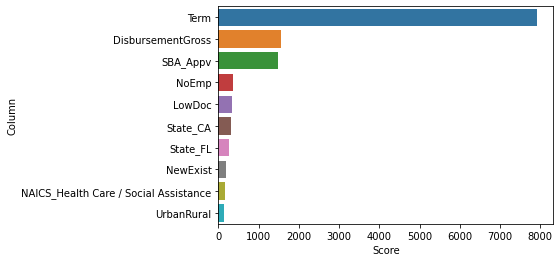

In [0]:
# Make plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column')

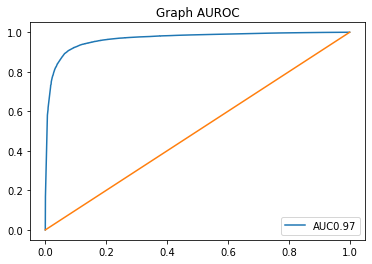

In [0]:
# -------- AUC-ROC Curve
pred_proba = LGBM_Model.predict_proba(X_test)
prediction_AUC = pred_proba[:,1]

FPR, TPR, Threshold = roc_curve(y_test,prediction_AUC)
roc_auc = auc(FPR,TPR)

# Plot
plt.plot(FPR,TPR,label=f'AUC{round(roc_auc,2)}')
plt.plot([0,1],[0,1])
plt.title('Graph AUROC')
plt.legend()

### Setting New Features and New Target, New Train Test Split, and SMOTE for Train Data

Next I will try to find other algorithms that may be give better result than algorithm that I used before. I will use this new features and target for the next process untill best tuning hyperparameter. But before start to modelling, I will standardize the continues data first like previous one.

In [0]:
# Setting Features and Target
X = df.drop(['MIS_Status'],axis=1)
y = df['MIS_Status']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SMOTE (get X_train_smote, y_train_smote)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)

# So we have new x_train, x_train_smote, and x_test
## we need to duplicate x_test, because one x_test will get standardize from normal x_train and the other one from SMOTE X_train
X_test_normal = X_test.copy()
X_test_smote = X_test.copy()

In [0]:
# Standar Scaler for normal data
## I separate it to make it easier when I use it to dashboard
scalernormal_gross = StandardScaler()
scalernormal_sba = StandardScaler()
scalernormal_term = StandardScaler()
scalernormal_emp = StandardScaler()

# Fit transform X_train
scaledgross = list(scalernormal_gross.fit_transform(X_train[['DisbursementGross']])[:,0])
X_train['DisbursementGross'] = scaledgross
# ------
scaledsba = list(scalernormal_sba.fit_transform(X_train[['SBA_Appv']])[:,0])
X_train['SBA_Appv'] = scaledsba
# ------
scaledterm = list(scalernormal_term.fit_transform(X_train[['Term']])[:,0])
X_train['Term'] = scaledterm
# -----
scaledemp = list(scalernormal_emp.fit_transform(X_train[['NoEmp']])[:,0])
X_train['NoEmp'] = scaledemp

# Fit transform X_test
scaledgrosstest = list(scalernormal_gross.transform(X_test_normal[['DisbursementGross']])[:,0])
X_test_normal['DisbursementGross'] =  scaledgrosstest
# -----
scaledsbatest = list(scalernormal_sba.transform(X_test_normal[['SBA_Appv']])[:,0])
X_test_normal['SBA_Appv'] = scaledsbatest
# -----
scaledtermtest = list(scalernormal_term.transform(X_test_normal[['Term']])[:,0])
X_test_normal['Term'] = scaledtermtest
# -----
scaledemptest = list(scalernormal_emp.transform(X_test_normal[['NoEmp']])[:,0])
X_test_normal['NoEmp'] = scaledemptest


# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# Standar Scaler for normal data
## I separate it to make it easier when I use it to dashboard
scalersmote_gross = StandardScaler()
scalersmote_sba = StandardScaler()
scalersmote_term = StandardScaler()
scalersmote_emp = StandardScaler()

# Fit transform X_train
scaledgrosssmote = list(scalersmote_gross.fit_transform(X_train_smote[['DisbursementGross']])[:,0])
X_train_smote['DisbursementGross'] = scaledgrosssmote
# ------
scaledsbasmote = list(scalersmote_sba.fit_transform(X_train_smote[['SBA_Appv']])[:,0])
X_train_smote['SBA_Appv'] = scaledsbasmote
# ------
scaledtermsmote = list(scalersmote_term.fit_transform(X_train_smote[['Term']])[:,0])
X_train_smote['Term'] = scaledtermsmote
# -----
scaledempsmote = list(scalersmote_emp.fit_transform(X_train_smote[['NoEmp']])[:,0])
X_train_smote['NoEmp'] = scaledempsmote

# Fit transform X_test
scaledgrosstestsmote = list(scalersmote_gross.transform(X_test_smote[['DisbursementGross']])[:,0])
X_test_smote['DisbursementGross'] =  scaledgrosstestsmote
# -----
scaledsbatestsmote = list(scalersmote_sba.transform(X_test_smote[['SBA_Appv']])[:,0])
X_test_smote['SBA_Appv'] = scaledsbatestsmote
# -----
scaledtermtestsmote = list(scalersmote_term.transform(X_test_smote[['Term']])[:,0])
X_test_smote['Term'] = scaledtermtestsmote
# -----
scaledemptestsmote = list(scalersmote_emp.transform(X_test_smote[['NoEmp']])[:,0])
X_test_smote['NoEmp'] = scaledemptestsmote

### F1 Score from All Algorithms

**I will use several algorithms for this binary classification, which are :**
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. LGBM Classifier
5. KNN

**Objective :** Find the best F1_Score with cross_val_method for normal data and SMOTE data

In [0]:
# F1 Score from Normal Train Data (without SMOTE)
# Using F1 Score because the data imbalance, so can't trust to accuracy

algorithm = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LGBMClassifier, KNeighborsClassifier]
algo_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','LGBMClassifier','KNeighborsClassifier']
algo_F1Score = []

for item in algorithm:
  model = item()
  F1Scores = cross_val_score(model,X_train,y_train,cv=5,scoring='f1').mean()
  algo_F1Score.append(F1Scores)

df_algo = pd.DataFrame({
    'Algorithm' : algo_name,
    'F1 Score' : algo_F1Score,
})

df_algo

Algorithm  F1 Score
0      LogisticRegression  0.912449
1  DecisionTreeClassifier  0.945587
2  RandomForestClassifier  0.951962
3          LGBMClassifier  0.962551
4    KNeighborsClassifier  0.918561

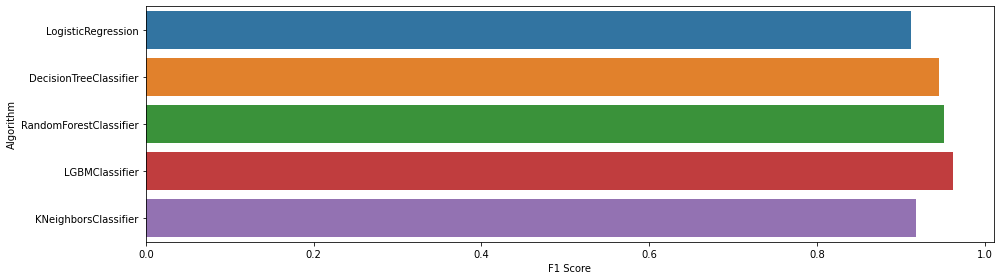

In [0]:
# Plot F1 Score from Normal Data Train

plt.figure(figsize=(14,4))
sns.barplot(data=df_algo,y='Algorithm',x='F1 Score')
plt.tight_layout()

In [0]:
# F1 Score from SMOTE Data Train

algo_F1Smote = []

for item in algorithm:
    model = item()
    F1ScoresSmote = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='f1').mean()
    algo_F1Smote.append(F1ScoresSmote)

df_algo_smote = pd.DataFrame({
    'Algorithm' : algo_name,
    'F1 Score SMOTE' : algo_F1Smote,
})

df_algo_smote

Algorithm  F1 Score SMOTE
0      LogisticRegression        0.753970
1  DecisionTreeClassifier        0.923702
2  RandomForestClassifier        0.926682
3          LGBMClassifier        0.925763
4    KNeighborsClassifier        0.869856

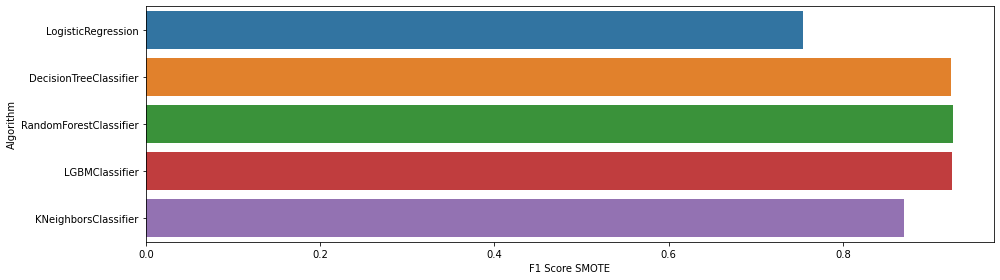

In [0]:
# Plot F1 Score from SMOTE Data Train

plt.figure(figsize=(14,4))
sns.barplot(data=df_algo_smote,y='Algorithm',x='F1 Score SMOTE')
plt.tight_layout()

> From the result, the normal train data give better result than smote data. So next, I will use the normal data (without smote) with the two of the best algorithms which are Random Forest and Light GBM.

### Random Forest and Tuning Hyperparameter

In [0]:
# Modelling and fitting
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train,y_train)

# predicting
prediction_rf = rf.predict(X_test_normal)

# Evaluation
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,prediction_rf))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_rf).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)


=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.82      0.67      0.74     14561
           1       0.94      0.97      0.95     71177

    accuracy                           0.92     85738
   macro avg       0.88      0.82      0.85     85738
weighted avg       0.92      0.92      0.92     85738


tn :  9791  fp :  4770  fn :  2080  tp :  69097


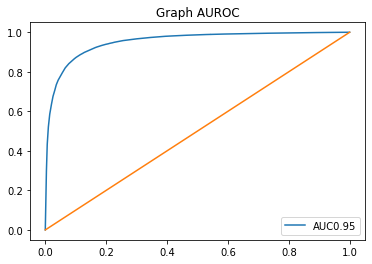

In [0]:
# -------- AUC-ROC Curve
pred_proba = rf.predict_proba(X_test_normal)
prediction_AUC = pred_proba[:,1]

FPR, TPR, Threshold = roc_curve(y_test,prediction_AUC)
roc_auc = auc(FPR,TPR)

# Plot
plt.plot(FPR,TPR,label=f'AUC{round(roc_auc,2)}')
plt.plot([0,1],[0,1])
plt.title('Graph AUROC')
plt.legend()

In [0]:
# --------- Tuning Hyperparameter Random Forest
rf_tuning1 = RandomForestClassifier(random_state=101)

# Hyperparameter for RandomForest
param_model_1 = {
    'n_estimators' : [100,150,200],
    'max_depth' : np.arange(4,14,2),
    'min_samples_split' : [i for i in range(3,17,2)],
    'min_samples_leaf' : [i for i in range(2,6)],
    'bootstrap' : [True,False]
}

# Grid Search CV
### model 1 from f1 score
GSCV_model_1 = GridSearchCV(estimator=rf_tuning1,
                     param_grid=param_model_1
                     ,scoring='f1',cv=5)

# Fitting Model 1
GSCV_model_1.fit(X_train,y_train)
prediction_1 = GSCV_model_1.predict(X_test_normal)

# Evaluate
print('=============== CLASSIFICATION REPORT SCORING FROM F1 SCORE ===============')
print(classification_report(y_test,prediction_1))
tn, fp, fn, tp = confusion_matrix(y_test,prediction_1).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)
print()
print('=============== BEST PARAMETERS SCORING FROM F1 SCORE ===============')
print(GSCV_model_1.best_params_)

=============== CLASSIFICATION REPORT SCORING FROM F1 SCORE ===============
              precision    recall  f1-score   support

           0       0.84      0.37      0.51     14561
           1       0.88      0.99      0.93     71177

    accuracy                           0.88     85738
   macro avg       0.86      0.68      0.72     85738
weighted avg       0.88      0.88      0.86     85738

tn :  5327  fp :  9234  fn :  1037  tp :  70140

=============== BEST PARAMETERS SCORING FROM F1 SCORE ===============
{'bootstrap': False, 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 200}


### Light GBM and Tuning Hyperparameter

In [0]:
# Modelling and fitting
lgbm = LGBMClassifier(random_state=101)
lgbm.fit(X_train,y_train)

# predicting
prediction_lgbm = lgbm.predict(X_test_normal)

# Evaluation
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,prediction_lgbm))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_lgbm).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     14561
           1       0.96      0.97      0.96     71177

    accuracy                           0.94     85738
   macro avg       0.90      0.88      0.89     85738
weighted avg       0.94      0.94      0.94     85738


tn :  11441  fp :  3120  fn :  2225  tp :  68952


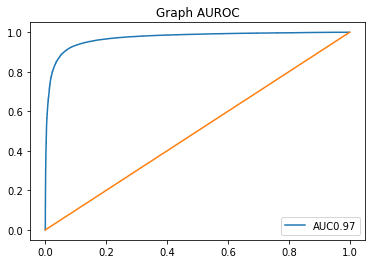

In [0]:
# -------- AUC-ROC Curve
pred_proba = lgbm.predict_proba(X_test_normal)
prediction_AUC = pred_proba[:,1]

FPR, TPR, Threshold = roc_curve(y_test,prediction_AUC)
roc_auc = auc(FPR,TPR)

# Plot
plt.plot(FPR,TPR,label=f'AUC{round(roc_auc,2)}')
plt.plot([0,1],[0,1])
plt.title('Graph AUROC')
plt.legend()

In [0]:
lgbm_tuning1 = LGBMClassifier(random_state=101)

# Hyperparameter for Light GBM Classifier
param_model_2 = {
    'max_depth' : [-1,7,12,14,17],
    'num_leaves' : [31,70,120],
    'min_data_in_leaf' : [60,100,120],
    'learning_rate' : [0.001,0.01,0.05],
    'num_iterations' :[200,400,600]
}

# Grid Search CV
### model 2 from f1 score
GSCV_model_2 = GridSearchCV(estimator=lgbm_tuning1,
                     param_grid=param_model_2
                     ,scoring='f1',cv=5)

# Fitting Model 2
GSCV_model_2.fit(X_train,y_train)
prediction_2 = GSCV_model_2.predict(X_test_normal)

# Evaluation 2
print('=============== CLASSIFICATION REPORT SCORING FROM F1 SCORE ===============')
print(classification_report(y_test,prediction_2))
tn, fp, fn, tp = confusion_matrix(y_test,prediction_2).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)
print()
print('=============== BEST PARAMETERS SCORING FROM F1 SCORE ===============')
print(GSCV_model_2.best_params_)

=============== CLASSIFICATION REPORT SCORING FROM F1 SCORE ===============
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     14561
           1       0.96      0.97      0.96     71177

    accuracy                           0.94     85738
   macro avg       0.90      0.89      0.90     85738
weighted avg       0.94      0.94      0.94     85738

tn :  11838  fp :  2723  fn :  2276  tp :  68901

=============== BEST PARAMETERS SCORING FROM F1 SCORE ===============
{'learning_rate': 0.05, 'max_depth': 12, 'min_data_in_leaf': 60, 'num_iterations': 600, 'num_leaves': 120}


> After doing tuning hyperparameter twice (Random Forest and Light GBM), Light GBM shows better result than random forest, and it gives better result too than our first light GBM. So I will evaluate this model, and try to adjust the threshold. 

### Evaluate The Best Model and Adjusting Threshold

In [0]:
# ------- Setting Features and Target
X = df.drop(['MIS_Status'],axis=1)
y = df['MIS_Status']

# ------- Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Standar Scaler
## I separate it to make it easier when I use it to dashboard
scalernormal_gross = StandardScaler()
scalernormal_sba = StandardScaler()
scalernormal_term = StandardScaler()
scalernormal_emp = StandardScaler()


# Fit transform X_train
scaledgross = list(scalernormal_gross.fit_transform(X_train[['DisbursementGross']])[:,0])
X_train['DisbursementGross'] = scaledgross
# ------
scaledsba = list(scalernormal_sba.fit_transform(X_train[['SBA_Appv']])[:,0])
X_train['SBA_Appv'] = scaledsba
# ------
scaledterm = list(scalernormal_term.fit_transform(X_train[['Term']])[:,0])
X_train['Term'] = scaledterm
# -----
scaledemp = list(scalernormal_emp.fit_transform(X_train[['NoEmp']])[:,0])
X_train['NoEmp'] = scaledemp


# Fit transform X_test
scaledgrosstest = list(scalernormal_gross.transform(X_test[['DisbursementGross']])[:,0])
X_test['DisbursementGross'] =  scaledgrosstest
# -----
scaledsbatest = list(scalernormal_sba.transform(X_test[['SBA_Appv']])[:,0])
X_test['SBA_Appv'] = scaledsbatest
# -----
scaledtermtest = list(scalernormal_term.transform(X_test[['Term']])[:,0])
X_test['Term'] = scaledtermtest
# -----
scaledemptest = list(scalernormal_emp.transform(X_test[['NoEmp']])[:,0])
X_test['NoEmp'] = scaledemptest

In [6]:
# Modelling and fitting
lgbm = LGBMClassifier(random_state=101,learning_rate=0.05,max_depth=12,min_data_in_leaf=60,num_iterations=600,num_leaves=120)
lgbm.fit(X_train,y_train) 

# predicting
prediction_lgbm = lgbm.predict(X_test) 

# Evaluation
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,prediction_lgbm))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_lgbm).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     14561
           1       0.96      0.97      0.96     71177

    accuracy                           0.94     85738
   macro avg       0.90      0.89      0.90     85738
weighted avg       0.94      0.94      0.94     85738


tn :  11838  fp :  2723  fn :  2276  tp :  68901


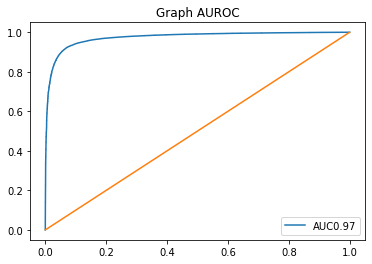

In [7]:
# -------- AUC-ROC Curve
pred_proba = lgbm.predict_proba(X_test)
prediction_AUC = pred_proba[:,1]

FPR, TPR, Threshold = roc_curve(y_test,prediction_AUC)
roc_auc = auc(FPR,TPR)

# Plot
plt.plot(FPR,TPR,label=f'AUC{round(roc_auc,2)}')
plt.plot([0,1],[0,1])
plt.title('Graph AUROC')
plt.legend()

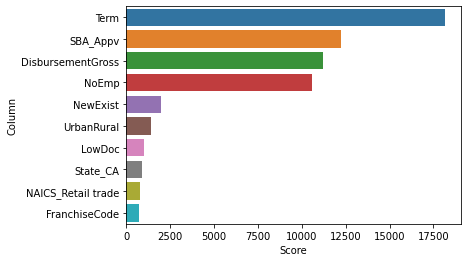

In [8]:
# feature importances
score = pd.DataFrame(lgbm.feature_importances_, columns=['Score'])
score['Column'] = X.columns
score.head()
# Make plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column')

In [21]:
# Try using threshold
pred_proba = lgbm.predict_proba(X_test)

# Adjust threshold
prediction_with_threshold = []
for item in pred_proba[:,0]:
    if item > 0.24 :
        prediction_with_threshold.append(0)
    else:
        prediction_with_threshold.append(1)
        
print('=============== CLASSIFICATION REPORT WITH THRESHOLD ===============')
print(classification_report(y_test,prediction_with_threshold))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_with_threshold).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT WITH THRESHOLD ===============
              precision    recall  f1-score   support

           0       0.75      0.91      0.82     14561
           1       0.98      0.94      0.96     71177

    accuracy                           0.93     85738
   macro avg       0.87      0.92      0.89     85738
weighted avg       0.94      0.93      0.94     85738


tn :  13196  fp :  1365  fn :  4387  tp :  66790


> This model shows better result than our first Light GBM model, so next we will validate this model using KFold to check stability of this model.

### Validation The Best Model with Threshold 0.24

In [22]:
# Try to validate using X_train data

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=101)

F1Scores = []
AccuracyScore = []
ClassReport = []

for train_index , test_index in kf.split(X_train,y_train):
    X_train_kf,X_test_kf,y_train_kf,y_test_kf = X_train.iloc[train_index],X_train.iloc[test_index],y_train.iloc[train_index],y_train.iloc[test_index]
    model = LGBMClassifier(random_state=101,learning_rate=0.05,max_depth=12,min_data_in_leaf=60,num_iterations=600,num_leaves=120)
    model.fit(X_train_kf,y_train_kf)
    #pred_proba
    pred = model.predict_proba(X_test_kf)
    # Adjust threshold for predictions proba
    pred_with_threshold = []
    for item in pred[:,0]:
        if item > 0.24 :
            pred_with_threshold.append(0)
        else:
            pred_with_threshold.append(1)
    F1Scores.append(round(f1_score(y_test_kf,pred_with_threshold),3))
    AccuracyScore.append(round(accuracy_score(y_test_kf,pred_with_threshold),3))
    ClassReport.append(classification_report(y_test_kf,pred_with_threshold))

    
print ("F1 Scores : ",F1Scores)
print ()
print ("Accuracy Scores : ",AccuracyScore)
print ()
n = 1
for item in ClassReport:
  print('================ Fold Number %d ================' %(n))
  n += 1
  print(item)
  print()

F1 Scores :  [0.957, 0.958, 0.956, 0.957, 0.957]

Accuracy Scores :  [0.93, 0.932, 0.928, 0.931, 0.931]

================ Fold Number 1 ================
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      6675
           1       0.98      0.94      0.96     33336

    accuracy                           0.93     40011
   macro avg       0.86      0.92      0.88     40011
weighted avg       0.94      0.93      0.93     40011


================ Fold Number 2 ================
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      6854
           1       0.98      0.94      0.96     33157

    accuracy                           0.93     40011
   macro avg       0.86      0.92      0.89     40011
weighted avg       0.94      0.93      0.93     40011


================ Fold Number 3 ================
              precision    recall  f1-score   support

           0       0.74      0.90      0

> **From validation using KFold, we could see that the model has very good stability. So, I will use this model and deploy to dashboard.**

### Dump Model

In [0]:
# -------- Save / Dump Model
from google.colab import files
import pickle

def local_persist(fname, modelname):
  fname = fname
  pickle.dump(modelname, open(fname, 'wb'))
  files.download(fname)

local_persist('LightGBM.sav',lgbm)

In [0]:
# -------- Save / Dump Scalernormal
def local_persist(fname, modelname):
  fname = fname
  pickle.dump(modelname, open(fname, 'wb'))
  files.download(fname)

local_persist('scalernormal_gross.sav',scalernormal_gross)
local_persist('scalernormal_sba.sav',scalernormal_sba)
local_persist('scalernormal_term.sav',scalernormal_term)
local_persist('scalernormal_emp.sav',scalernormal_emp)